In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Define the directory containing the text files
directory = '/Users/mistryk2/Desktop/Pressure_Data'

# Use glob to get all text files in the directory
file_paths = glob.glob(f"{directory}/*Pressure*.txt")
print(file_paths)

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop over each file path
for file_path in file_paths:
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', skiprows=2, decimal=',')
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
print(final_df.head())

# Convert the 'Date' and 'Hour' columns to a single datetime column
final_df['Datetime'] = pd.to_datetime(final_df['Date'] + ' ' + final_df['Hour'], dayfirst=True)


final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9
GasPressure = final_df.sort_values(by='UnixTime')
display(GasPressure)

['/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-22.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-27.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-26.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-23.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-18.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-21.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-09.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-24.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-30.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-25.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-08.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-20.txt', '/Users/mistryk2/Desktop/Pr

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_15731/391796961.py:33: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9


,Date,Hour,PG1,PG2,PG3,PG5,PG6,PG7,PG8,DF,Datetime,UnixTime
1884377,08/05/2024,23:58:30,0.000,9.016,4.185,3.858,3.634,0.088,0.907,0.798,2024-05-08 23:58:30,1715212710
1884378,08/05/2024,23:58:32,0.000,9.026,4.185,3.904,3.701,0.091,0.910,0.798,2024-05-08 23:58:32,1715212712
1884379,08/05/2024,23:58:34,0.000,9.021,4.182,3.862,3.698,0.091,0.907,0.798,2024-05-08 23:58:34,1715212714
1884380,08/05/2024,23:58:36,0.000,9.010,4.181,3.902,3.601,0.088,0.906,0.798,2024-05-08 23:58:36,1715212716
1884381,08/05/2024,23:58:38,0.000,9.005,4.184,3.858,3.732,0.093,0.908,0.798,2024-05-08 23:58:38,1715212718
...,...,...,...,...,...,...,...,...,...,...,...,...
1454500,02/09/2024,16:03:16,0.000,9.000,4.140,3.990,3.711,0.100,0.910,0.799,2024-09-02 16:03:16,1725292996
1454501,02/09/2024,16:03:18,0.010,9.084,4.143,3.934,3.798,0.097,0.922,0.792,2024-09-02 16:03:18,1725292998
1454502,02/09/2024,16:03:20,0.000,9.089,4.134,3.955,3.641,0.095,0.912,0.803,2024-09-02 16:03:20,1725293000
1454503,02/09/2024,16:03:22,0.010,9.047,4.133,3.933,3.847,0.098,0.916,0.800,2024-09-02 16:03:22,1725293002


In [2]:
# Now load in the dice

# Define the directory containing the text files
directory = '/Users/mistryk2/Desktop/Dice_Temps/'

# Use glob to get all text files in the directory
file_paths = glob.glob(f"{directory}/*.txt")
print(file_paths)

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop over each file path
for file_path in file_paths:
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', skiprows=2, decimal=',', encoding='ISO-8859-1')
    # df = df.loc[:, ~df.columns.str.contains('V')]
    # df = df.loc[:, ~df.columns.str.contains('(A)')]
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# # Filter columns with names containing '(ºC) T'
# filtered_columns = df.filter(like='(ºC) T')

# # Calculate the mean of these columns by row
# final_df['Mean_DICE_T'] = filtered_columns.mean(axis=1)

# # Optionally, drop the original columns if they are no longer needed
# final_df = final_df.drop(columns=filtered_columns.columns)
# final_df = final_df.fillna(0)

# Display the final DataFrame
print(final_df.head())

# Convert the 'Date' and 'Hour' columns to a single datetime column
final_df['Datetime'] = pd.to_datetime(final_df['Date'] + ' ' + final_df['Hour'], dayfirst=True)


final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9
SiPM_Temps = final_df.sort_values(by='UnixTime')
display(SiPM_Temps)

['/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-12.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-13.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-11.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-07-28.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-07-29.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-10.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-14.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-28.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_Data_Report_2022-01-20.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-09-01.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-29.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-15.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-17.txt', '/Users/mistryk2/De

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_15731/2480464721.py:43: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9


,Date,Hour,DICE0(V) V,DICE1(V) V,DICE2(V) V,DICE3(V) V,DICE4(V) V,DICE5(V) V,DICE6(V) V,DICE7(V) V,...,Currents_0,Currents_1,Currents_2,Currents_3,Voltages_0,Voltages_1,Voltages_2,Voltages_3,Datetime,UnixTime
43099,20/01/2022,10:06:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 10:06:41,1642673201
43100,20/01/2022,10:06:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 10:06:43,1642673203
43101,20/01/2022,10:06:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 10:06:45,1642673205
43102,20/01/2022,10:06:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 10:06:47,1642673207
43103,20/01/2022,10:06:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 10:06:49,1642673209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78975,02/09/2024,16:03:47,0.010856,0.018616,0.011930,0.106488,0.085210,6.75394,0.018212,0.009706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 16:03:47,1725293027
78976,02/09/2024,16:03:52,0.013584,0.018644,0.012944,0.106488,0.085210,6.75149,0.017918,0.008756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 16:03:52,1725293032
78977,02/09/2024,16:03:57,0.013584,0.018644,0.012944,0.106488,0.085210,6.75149,0.017918,0.008756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 16:03:57,1725293037
78978,02/09/2024,16:04:02,0.012388,0.018400,0.012798,0.106994,0.084982,6.75266,0.017588,0.009444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 16:04:02,1725293042


,PG1,PG2,PG3,PG5,PG6,PG7,PG8,DF,UnixTime,PG3Delta,PG6Delta
Datetime,,,,,,,,,,,
2024-05-09 00:00:00,5.947193e-07,8.857147,4.183374,3.882714,3.671028,0.090009,0.905744,0.797307,1.715215e+09,0.000000,0.000000
2024-05-09 01:00:00,3.908306e-06,8.854818,4.182832,3.884572,3.672597,0.090408,0.905835,0.797152,1.715218e+09,-0.000542,0.001569
2024-05-09 02:00:00,3.398056e-06,8.860112,4.182094,3.886064,3.673068,0.090645,0.905866,0.797070,1.715222e+09,-0.001279,0.002040
2024-05-09 03:00:00,1.238403e-05,8.858398,4.181942,3.887151,3.673015,0.091315,0.905947,0.797178,1.715225e+09,-0.001432,0.001987
2024-05-09 04:00:00,2.361164e-05,8.858296,4.181669,3.889124,3.671989,0.091617,0.906013,0.797116,1.715229e+09,-0.001704,0.000961
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02 12:00:00,1.698890e-03,9.105435,4.138412,3.950323,3.757357,0.090797,0.915430,0.798265,1.725280e+09,-0.044962,0.086329
2024-09-02 13:00:00,1.963340e-03,9.105461,4.138936,3.950796,3.757331,0.090982,0.915544,0.798353,1.725284e+09,-0.044437,0.086304
2024-09-02 14:00:00,2.397708e-03,9.075373,4.139040,3.951404,3.758000,0.091607,0.915296,0.798431,1.725287e+09,-0.044334,0.086972


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


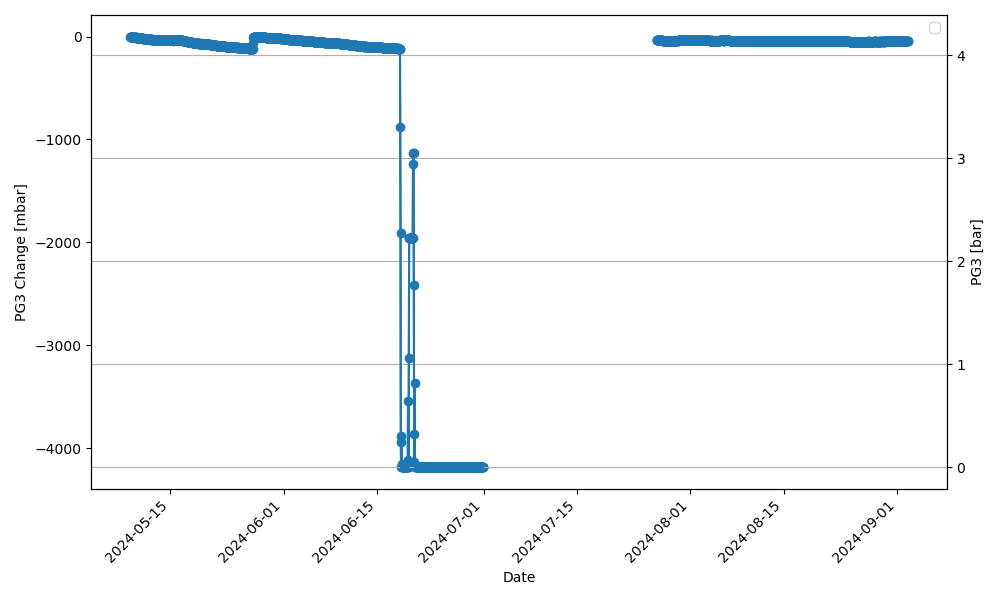

In [7]:
%matplotlib widget


# filtered_df = GasPressure[GasPressure['Datetime'] > pd.Timestamp('2024-07-31')]
# filtered_df = filtered_df[filtered_df['Datetime'] < pd.Timestamp('2024-07-29')]

filtered_df = GasPressure[GasPressure['Datetime'] > pd.Timestamp('2024-05-09')]
# filtered_df = filtered_df[filtered_df['Datetime'] < pd.Timestamp('2024-06-07')]



filtered_df.set_index('Datetime', inplace=True)

hourly_means_gas = filtered_df.resample('H').mean()
hourly_means_gas["PG3Delta"] = hourly_means_gas["PG3"] - hourly_means_gas["PG3"].iloc[0]
hourly_means_gas["PG6Delta"] = hourly_means_gas["PG6"] - hourly_means_gas["PG6"].iloc[0]


display(hourly_means_gas)

# Plot Date vs PG3
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1.plot(hourly_means_gas.index, hourly_means_gas['PG3Delta']*1000, marker='o', linestyle='-')
ax1.plot(hourly_means_gas.index, hourly_means_gas['PG3Delta']*1000, marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('PG3 Change [mbar]')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(hourly_means_gas.index, hourly_means_gas['PG3'])
# ax2.plot(hourly_means_gas.index, hourly_means_gas['PG6'])
ax2.tick_params(axis='y')
ax2.set_ylabel('PG3 [bar]')
ax2.grid()


for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

fig.tight_layout()

# plt.plot(hourly_means_gas.index, hourly_means_gas['PG3'], label='PG3', marker='o', linestyle='-')
# # plt.plot(filtered_df['Datetime'], Smooth_PG3, label='PG3', linestyle='-')
# plt.xlabel('Date')
# plt.ylabel('PG3')
# plt.title('Date vs PG3')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# plt.ylim(4.14,4.16)

,DICE0(V) V,DICE1(V) V,DICE2(V) V,DICE3(V) V,DICE4(V) V,DICE5(V) V,DICE6(V) V,DICE7(V) V,DICE8(V) V,DICE9(V) V,...,DICE51(A) I,DICE52(A) I,DICE53(A) I,DICE54(A) I,DICE55(A) I,Voltages_0,Voltages_1,Voltages_2,Voltages_3,UnixTime
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-09 00:00:00,0.012030,0.098558,0.171400,0.018885,0.010590,0.011676,0.148991,0.293622,0.063635,0.015347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715215e+09
2024-05-09 01:00:00,0.012062,0.098410,0.171343,0.018716,0.010512,0.011603,0.148842,0.293353,0.063525,0.015223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715218e+09
2024-05-09 02:00:00,0.011988,0.098655,0.171751,0.018859,0.010551,0.011625,0.149260,0.294200,0.063714,0.015216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715222e+09
2024-05-09 03:00:00,0.012049,0.098703,0.171680,0.018747,0.010559,0.011523,0.149124,0.293938,0.063745,0.015281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715225e+09
2024-05-09 04:00:00,0.012037,0.098786,0.171995,0.018764,0.010585,0.011653,0.149411,0.294342,0.063870,0.015297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715229e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02 12:00:00,0.012460,0.019013,0.012925,0.107376,0.086282,6.753285,0.017763,0.009391,0.011797,0.043488,...,8.846761e-08,1.307722e-07,3.060000e-08,1.822515e-07,1.673783e-07,NaN,NaN,NaN,NaN,1.725280e+09
2024-09-02 13:00:00,0.012462,0.019050,0.012953,0.107153,0.086091,6.754057,0.017756,0.009339,0.011832,0.043330,...,8.920472e-08,1.343850e-07,2.907917e-08,1.841783e-07,1.742453e-07,NaN,NaN,NaN,NaN,1.725284e+09
2024-09-02 14:00:00,0.012459,0.019020,0.012919,0.107597,0.086453,6.754400,0.017820,0.009348,0.011857,0.043542,...,9.228694e-08,1.184994e-07,2.877500e-08,1.820472e-07,1.701703e-07,NaN,NaN,NaN,NaN,1.725287e+09


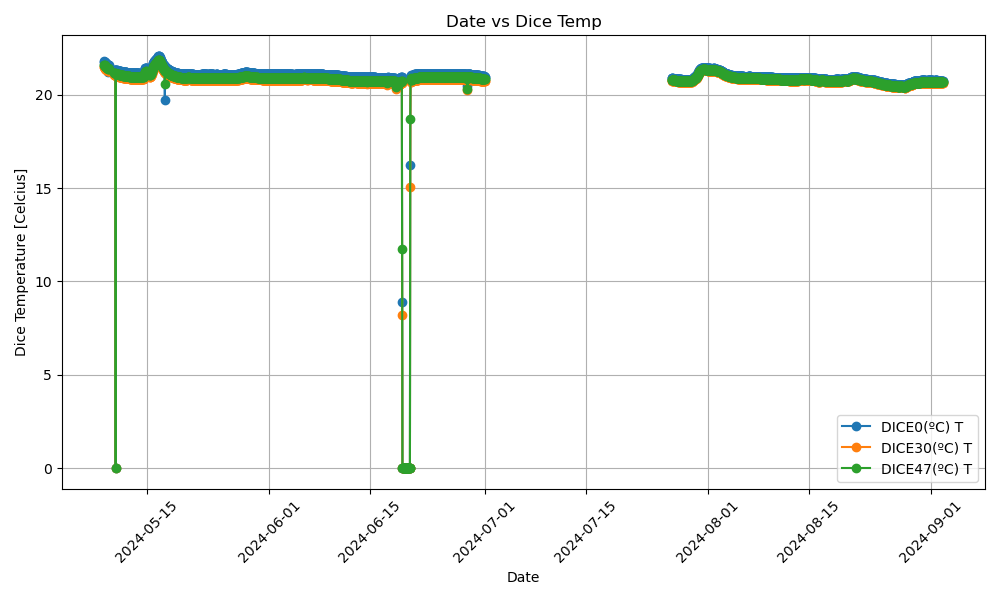

(20.0, 23.0)

In [9]:
%matplotlib widget


# SiPM_Temps_filter = SiPM_Temps[SiPM_Temps['Datetime'] > pd.Timestamp('2024-07-31')]
# SiPM_Temps_filter = SiPM_Temps_filter[SiPM_Temps_filter['Datetime'] < pd.Timestamp('2024-07-29')]
# 
SiPM_Temps_filter = SiPM_Temps[SiPM_Temps['Datetime'] > pd.Timestamp('2024-05-09')]
# SiPM_Temps_filter = SiPM_Temps_filter[SiPM_Temps_filter['Datetime'] < pd.Timestamp('2024-06-07')]


SiPM_Temps_filter.set_index('Datetime', inplace=True)

hourly_means_sipm = SiPM_Temps_filter.resample('H').mean()
display(hourly_means_sipm)

# Plot Date vs PG3
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE0(ºC) T'], label='DICE0(ºC) T', marker='o', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE30(ºC) T'], label='DICE30(ºC) T', marker='o', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE47(ºC) T'], label='DICE47(ºC) T', marker='o', linestyle='-')
# plt.plot(filtered_df['Datetime'], SmSiPM_Tempsabel='PG3', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Dice Temperature [Celcius]')
plt.title('Date vs Dice Temp')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.ylim(20,23)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


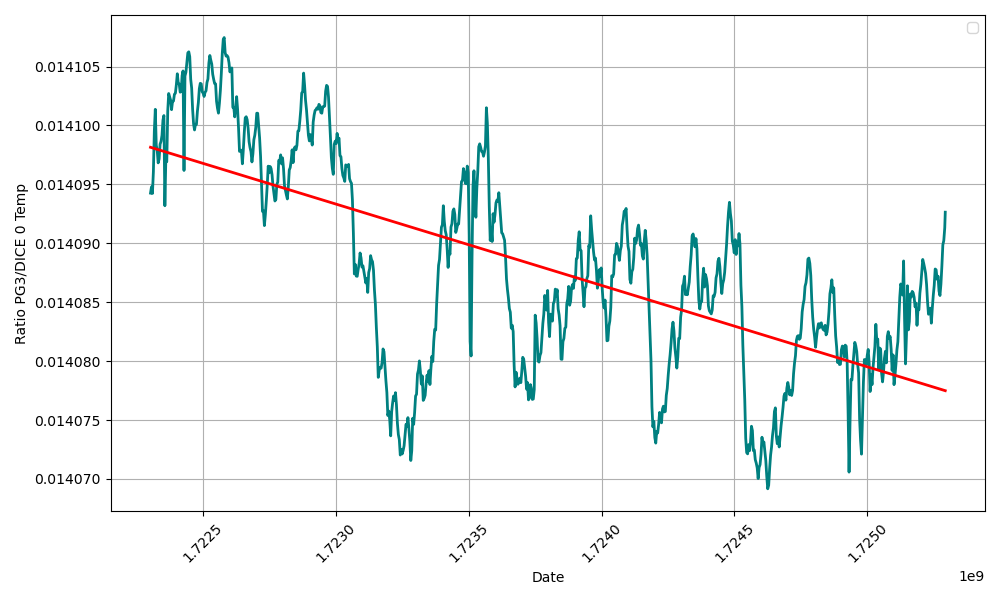

In [24]:
from scipy.optimize import curve_fit
import numpy as np
%matplotlib widget


def fun_line(x, m, c):
    return m*x + c


# Plot Date vs PG3
plt.figure(figsize=(10, 6))

Pressure_norm = (hourly_means_gas['PG3'] - min(hourly_means_gas['PG3']))/max(hourly_means_gas['PG3']- min(hourly_means_gas['PG3']))
SiPM_norm0  = (hourly_means_sipm['DICE0(ºC) T'] - min(hourly_means_sipm['DICE0(ºC) T']))/max(hourly_means_sipm['DICE0(ºC) T'] - min(hourly_means_sipm['DICE0(ºC) T']))
# SiPM_norm10  = (hourly_means_sipm['DICE10(ºC) T'] - min(hourly_means_sipm['DICE10(ºC) T']))/max(hourly_means_sipm['DICE10(ºC) T'] - min(hourly_means_sipm['DICE10(ºC) T']))
# SiPM_norm30  = (hourly_means_sipm['DICE30(ºC) T'] - min(hourly_means_sipm['DICE30(ºC) T']))/max(hourly_means_sipm['DICE30(ºC) T'] - min(hourly_means_sipm['DICE30(ºC) T']))

# plt.plot(hourly_means_gas.index, Pressure_norm, label='PG3', marker='o', linestyle='-')
# plt.plot(hourly_means_sipm.index, SiPM_norm0, label='DICE0(ºC) T', marker='o', linestyle='-')


hourly_means_sipm = hourly_means_sipm[hourly_means_sipm["UnixTime"] > 1.7223e9]
hourly_means_gas = hourly_means_gas[hourly_means_gas["UnixTime"] > 1.7223e9]

# plt.plot(hourly_means_sipm.index,  hourly_means_gas['PG3']/(hourly_means_sipm['DICE0(ºC) T']+273), color= "Teal", linewidth = 2)
plt.plot(hourly_means_sipm.UnixTime,  hourly_means_gas['PG3']/(hourly_means_sipm['DICE0(ºC) T']+273), color= "Teal", linewidth = 2)

popt, pcov = curve_fit(fun_line, hourly_means_sipm.UnixTime,  hourly_means_gas['PG3']/(hourly_means_sipm['DICE0(ºC) T']+273))

x_fit = np.linspace(min(hourly_means_sipm.UnixTime), max(hourly_means_sipm.UnixTime), 1000)
y_fit = fun_line(x_fit, popt[0], popt[1])
plt.plot(x_fit,y_fit, color="red", linewidth = 2)



plt.xlabel('Date')
# plt.ylabel('Normalized Amplitude')
plt.ylabel('Ratio PG3/DICE 0 Temp')
# plt.title('Date vs PG3')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# plt.ylim(0.18,0.22)
plt.tight_layout()

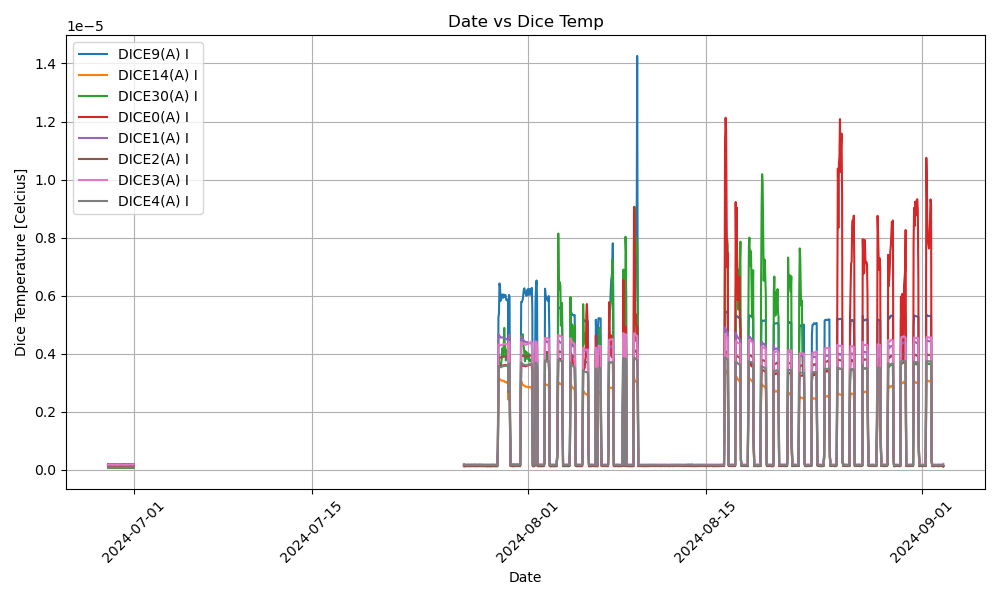

1.6036346793352032e-06
1.2284166090327266e-06


In [6]:
import numpy as np
# Plot Date vs PG3
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE9(A) I'], label='DICE9(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE14(A) I'], label='DICE14(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE30(A) I'], label='DICE30(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE0(A) I'], label='DICE0(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE1(A) I'], label='DICE1(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE2(A) I'], label='DICE2(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE3(A) I'], label='DICE3(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE4(A) I'], label='DICE4(A) I', linestyle='-')
# plt.plot(filtered_df['Datetime'], SmSiPM_Tempsabel='PG3', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Dice Temperature [Celcius]')
plt.title('Date vs Dice Temp')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# plt.ylim(20,23)
print(np.mean(hourly_means_sipm['DICE0(A) I']))
print(np.mean(hourly_means_sipm['DICE2(A) I']))